In [1]:
#standard imports

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#tools

from scipy.optimize import curve_fit as cf
import scipy.constants as sc

%matplotlib inline

In [3]:
#loading the data

binary_data = np.loadtxt('Binary_data 2.csv',delimiter=',')

In [4]:
#Distributing the data as time, redshift1 (red1) and redshift2 (red2)

time = binary_data[:,0]
red1 = binary_data[:,1]
red2 = binary_data[:,2]

In [5]:
#Defining a function to calculate the velocities of respective stars at different times using the redshift data. 
#The values are stored in an array format as star1_vel and star2_vel for star1 and star2 respectively.

def velocity(z):
    """ Returns the value of velocity by using the formula: velocity of star = redshift * speed of light """
    c = sc.c/1000
    return c*z

star1_vel = velocity(red1)
star2_vel = velocity(red2)

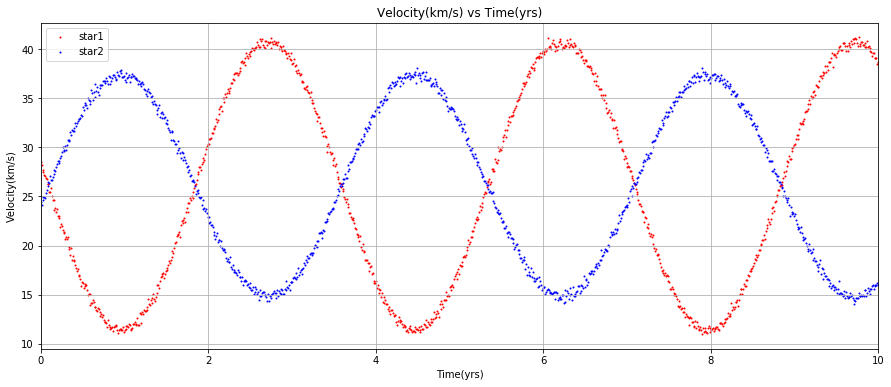

In [6]:
#Plott a scatter graph to see how the data looks

plt.figure(figsize=(15,6))
plt.scatter(time,star1_vel,s=1,color='r',label='star1')
plt.scatter(time,star2_vel,s=1,color='blue',label='star2')
plt.title('Velocity(km/s) vs Time(yrs)')
plt.xlim(0,10)
plt.xlabel('Time(yrs)')
plt.ylabel('Velocity(km/s)')
plt.grid()
plt.legend()

In [7]:
#Radial velocity calculation and removal from the velocity data.



#The graph shows two curves resembling a sinusoidal curve and shifted considerably in the y-axis. Also both seem to 
#intersect at particular time co-ordinates indicating there is an additional velocity to their orbital velocity.
#If the center of mass of the system would have been at rest the value of velocity would have been zero at 
#intersection points, owing to the direction of orbital velocity being perpendicular(or zero redshift),
#but both the curves oscillate about a common velocity and this velocity indicates 
#the radial velocity of the center of mass.

idx = np.argwhere(np.diff(np.sign(star1_vel-star2_vel))).flatten() #getting the indices of the intersection points



#the mean of velocity values at the intersection points is taken to get a good approximate of the radial velocity 
#of the center of mass.

rec = np.mean(star1_vel[idx])



#Subtracting radial velocity of center of mass from velocity to obtain the graph of radial component of
#orbital velocity of the stars.

cvel1=[]
cvel2=[]
for i in range (len(time)):
    cvel1.append(star1_vel[i] - rec)
    cvel2.append(star2_vel[i] - rec)

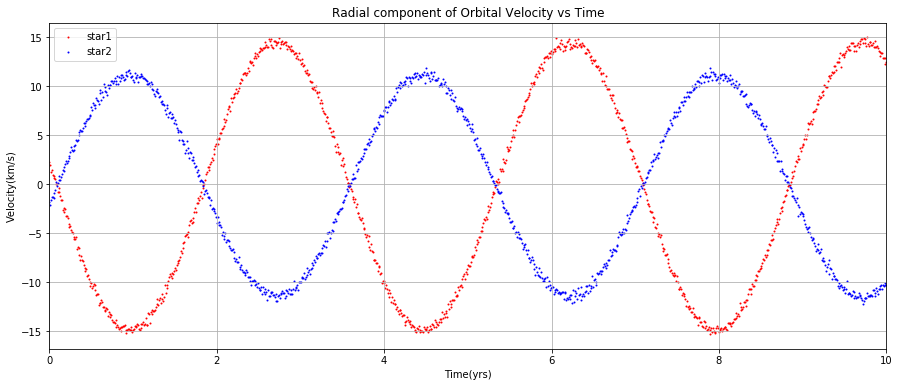

In [8]:
#This plot is for testing whether the radial velocity of the center of mass has been removed.

plt.figure(figsize=(15,6))
plt.scatter(time,cvel1,s=1,color='r',label='star1')
plt.scatter(time,cvel2,s=1,color='blue',label='star2')
plt.xlim(0,10)
plt.xlabel('Time(yrs)')
plt.ylabel('Velocity(km/s)')
plt.title('Radial component of Orbital Velocity vs Time')
plt.grid()
plt.legend()

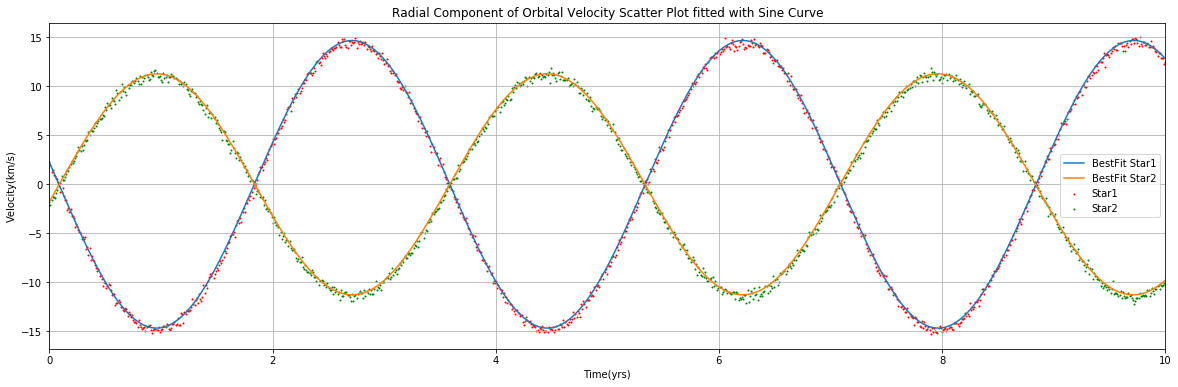

In [9]:
#Fitting the orbital velocity data with a sine curve

def sinf(x,a,b,c):
    return a*np.sin(b*x+c)


#guess values for the paramters
g1=15000                    #amplitude guess by looking at th graph or calculating rms.
g2=2*np.pi/3.5              #angular frequency guessed by guessing the time period.
g3=-(np.pi /2)+4.5          #phase guess by adjusting
init_guess = [g1,g2,g3]


#optimized parameters and covariance matrix for both the stars.
p_opt2, p_cov2 = cf(sinf, time, cvel2, p0=init_guess ) 
p_opt1, p_cov1 = cf(sinf, time, cvel1, p0=init_guess )


#plotting
plt.figure(figsize=(20,6))
plt.scatter(time,cvel1,color='r',s=1,label='Star1')
plt.plot(time,sinf(time,*p_opt1),label='BestFit Star1')
#plt.plot(time,sinf(time,*init_guess),label='optimized')     #To check the guess values
plt.scatter(time,cvel2,color='green',s=1,label='Star2')
plt.plot(time,sinf(time,*p_opt2),label='BestFit Star2')
#plt.plot(time,sinf(time,*init_guess),label='optimized')     #To check the guess values
plt.title('Radial Component of Orbital Velocity Scatter Plot fitted with Sine Curve')
plt.xlabel('Time(yrs)')
plt.ylabel('Velocity(km/s)')
plt.xlim(0,10)
plt.grid()
plt.legend()

In [10]:
#The plot parameters p_opt1[1] and p_opt2[1] give the angular frequencies of the sine wave  or for that matter our stars
#Since in a binary both the stars have the same time period and hence the same angular frequency,the value of these
#parameters must be the same or with a very small difference. Thus we take a mean of these two values and find Time period 
# using: Time Period = (2*pi) / angular frequency

angf_mean = (p_opt1[1]+p_opt1[1])/2
T = (2*np.pi/angf_mean)*(365*24*3600)    #Conversion into seconds for further calculations.
t_yrs = (2*np.pi/angf_mean)





#At the peaks, the direction of orbital velocity is parallel to the line of sight and hence the amplitude of the sine wave 
#gives the orbital velocity

O_vel1 = p_opt1[0]*1000
O_vel2 = -p_opt2[0]*1000




#The function uses the value of Time period, velocity of the star for which the mass is being calculated(v_star) and the 
# velocity of the partner star(v_part).

def solar_mass(T,v_star,v_part):
    """ Calculates and returns the mass of star in solar mass"""
    p1 = (T*v_part)/(2*np.pi*sc.G)
    p2 = (v_star + v_part)**2
    m = (p1*p2)/1.989e+30      #uses derived formula
    return m

mass1 = solar_mass(T,O_vel1,O_vel2)
mass2 = solar_mass(T,O_vel2,O_vel1) 

In [39]:
# FINAL OUTPUT

print("Period of revolution is: {} years".format(t_yrs))
print("Mass of lighter star is: {} solar mass".format(mass1))
print("Mass of heavier star is: {} solar mass".format(mass2))

Period of revolution is: 3.5021448509295716 years
Mass of lighter star is: 1.0016629339323149 solar mass
Mass of heavier star is: 1.303500893740367 solar mass
